<a href="https://colab.research.google.com/github/maadmaaax/Project_NBA_GroupM/blob/main/Analyse_Graphique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!pip install requests beautifulsoup4 pandas #requestsfetches the page,beautifulsoup4finds the data on the page, andpandas` organizes it into a table.

In [31]:
#Run the file that possess data loading and cleaning to access relevant data set
!git clone https://github.com/maadmaaax/Project_NBA_GroupM
!jupyter nbconvert --to python Project_NBA_GroupM/Analyse_Principale.ipynb
%run Project_NBA_GroupM/Analyse_Principale.py
!pip install svgpath2mpl
import numpy as np
import matplotlib.pyplot as plt
import tabulate as tbl


fatal: destination path 'Project_NBA_GroupM' already exists and is not an empty directory.
[NbConvertApp] Converting notebook Project_NBA_GroupM/Analyse_Principale.ipynb to python
[NbConvertApp] Writing 18767 bytes to Project_NBA_GroupM/Analyse_Principale.py
fatal: destination path 'Project_NBA_GroupM' already exists and is not an empty directory.
    Rk             Player   Age Team Pos     G    GS    MP    FG   FGA  ...  \
0  1.0      Allen Iverson  29.0  PHI  PG  75.0  75.0  42.3  10.3  24.2  ...   
1  2.0        Kobe Bryant  26.0  LAL  SG  66.0  66.0  40.7   8.7  20.1  ...   
2  3.0       LeBron James  20.0  CLE  SF  80.0  80.0  42.4   9.9  21.1  ...   
3  4.0      Dirk Nowitzki  26.0  DAL  PF  78.0  78.0  38.7   8.5  18.5  ...   
4  5.0  Amar'e Stoudemire  22.0  PHO   C  80.0  80.0  36.1   9.3  16.7  ...   

   Season       TS%  PTS_per_36  AST_per_36  TRB_per_36  STL_per_36  \
0    2005  0.532616   26.127660    6.723404    3.404255    2.042553   
1    2005  0.562256   24.412776  

,Player,Season,MVP_score
12579,Nikola Jokić,2025,99.523975
11842,Luka Don?i?,2024,99.120225
11841,Joel Embiid,2024,98.361982
7020,Russell Westbrook,2017,98.019444
11852,Nikola Joki?,2024,97.256454
10357,Nikola Jokić,2022,97.136405
8281,James Harden,2019,97.134159
2847,LeBron James,2010,96.847076
12578,Giannis Antetokounmpo,2025,96.322179
11162,Luka Dončić,2023,96.192426


 ## **Are 3-pointers more efficient than other field goals ?**


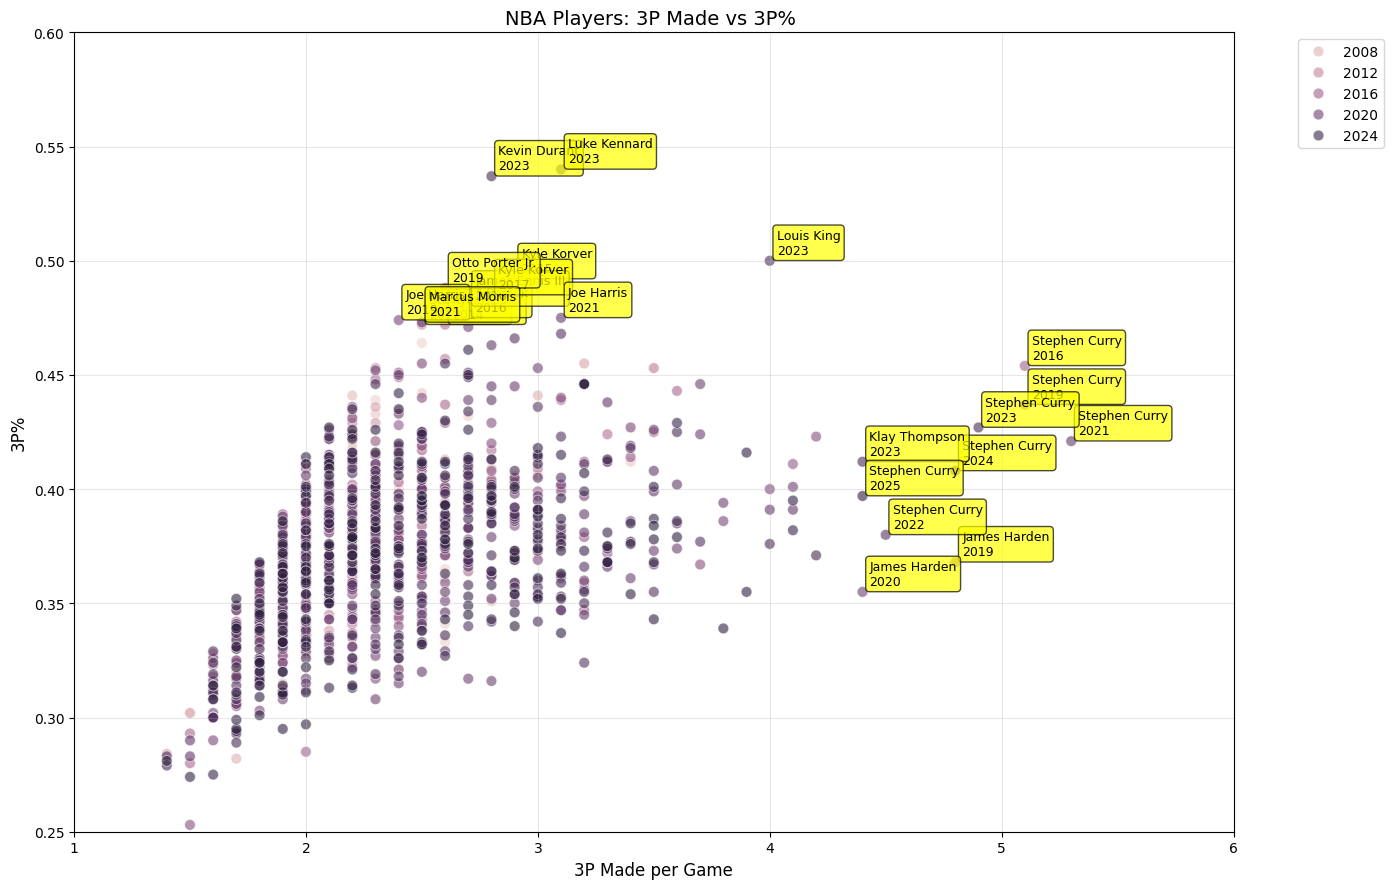

We can see that there's 2 type of outlier, the first category we will call selective
shooter with high efficiency 47-54% but relatively low 3P made less than 3.5 some notable player are Kevin Durant, Luke Kennard or Kyle Korver.
The second category are the volume shooter they still have above average accuracy
35-46% but high number of 3 point made more than 3.9 and up to 5.5 3PM, the face of this category is Stephen Curry


In [47]:
#3P made vs 3P% by players. This graph allow us to see the tradeoff between accurary 3P% and volume 3P made


df = nbas_data_full

#Keeping only player who attempted more than 5 3P to filter noise created by player who doesn't shoot often
relevant = relevant[relevant['3PA'] >= 5.0]



# Define outliers: top 10 by 3P made OR extreme 3P% within range
outliers = pd.concat([
    relevant.nlargest(10, '3P'), #Top 10 most productive (3P)
    relevant[relevant['3P%'] >= relevant['3P%'].quantile(0.99)],  # Top 1% most accurate (3P%)
]).drop_duplicates()

# Create the scatter plot
plt.figure(figsize=(14, 9))
scatter = sns.scatterplot(data=relevant, x='3P', y='3P%', hue='Season', alpha=0.6, s=60)

# Add outlier labels
for idx, row in outliers.iterrows():
    plt.annotate(f"{row['Player']}\n{int(row['Season'])}",
                xy=(row['3P'], row['3P%']),
                xytext=(5, 5), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                fontsize=9, ha='left')

plt.xlabel('3P Made per Game', fontsize=12)
plt.ylabel('3P%', fontsize=12)
plt.title('NBA Players: 3P Made vs 3P% ', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.ylim(0.25, 0.60)  # Lock y-axis to only display the relevant range
plt.xlim(1, 6)
plt.tight_layout()
plt.show()



print("We can see that there's 2 type of outlier, the first category we will call selective")
print("shooter with high efficiency 47-54% but relatively low 3P made less than 3.5 some notable player are Kevin Durant, Luke Kennard or Kyle Korver.")
print("The second category are the volume shooter they still have above average accuracy")
print( "35-46% but high number of 3 point made more than 3.9 and up to 5.5 3PM, the face of this category is Stephen Curry")

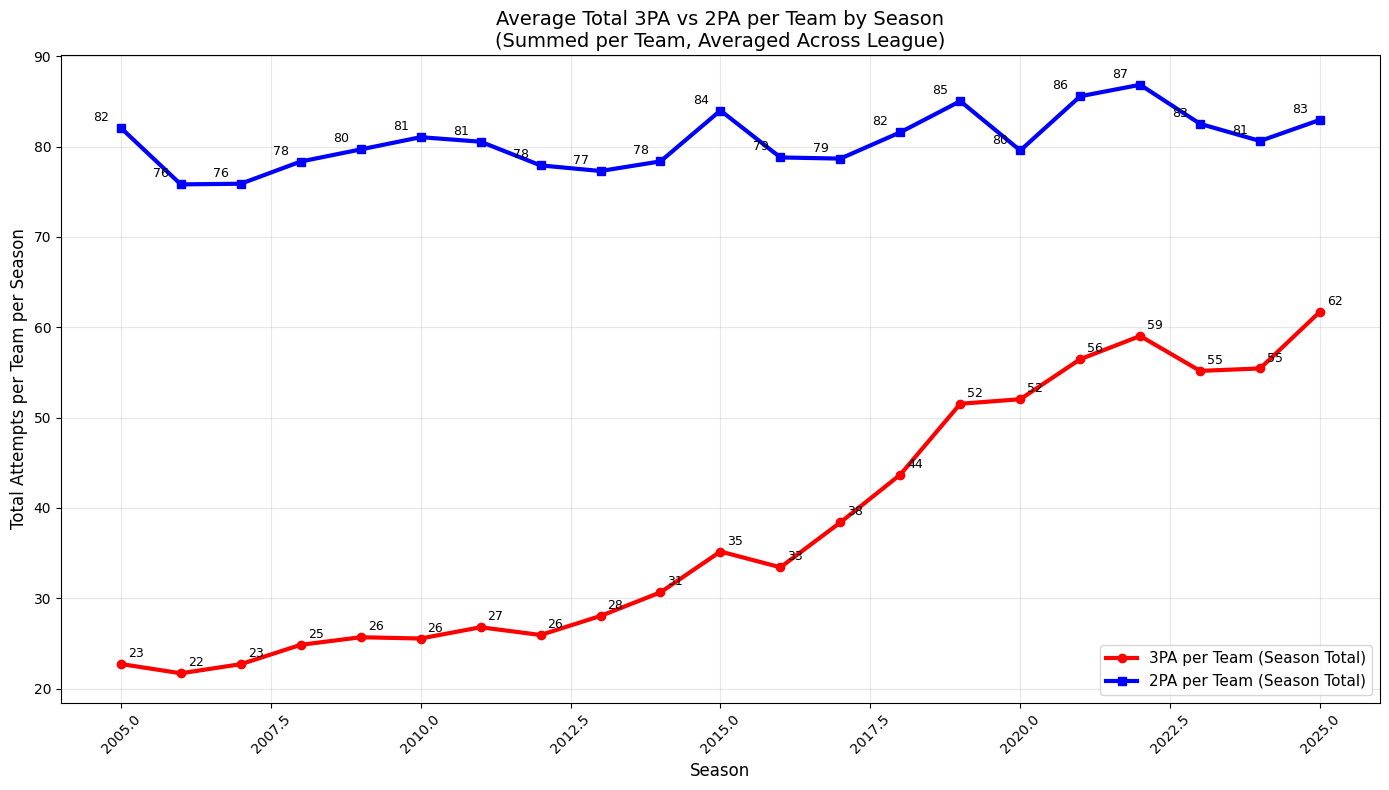


3PA Growth: 62 in 2025 (+172% from 2005)

2PA Growth: 83 in 2025 (-1% from 2005)


In [50]:
#Evolution of shot attempt by team,  This is to see if there's any trend on the kind of shot that team take
# Group by Season and Team, sum attempts per team, then average across teams per season
team_attempts = df.groupby(['Season', 'Team'])[['3PA', '2PA']].sum().reset_index()
season_team_avg = team_attempts.groupby('Season')[['3PA', '2PA']].mean().reset_index()
season_team_avg['Season'] = pd.to_numeric(season_team_avg['Season'], errors='coerce')



# Create the line plot
plt.figure(figsize=(14, 8))
plt.plot(season_team_avg['Season'], season_team_avg['3PA'],
         marker='o', linewidth=3, label='3PA per Team (Season Total)', color='red')
plt.plot(season_team_avg['Season'], season_team_avg['2PA'],
         marker='s', linewidth=3, label='2PA per Team (Season Total)', color='blue')


plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Attempts per Team per Season', fontsize=12)
plt.title('Average Total 3PA vs 2PA per Team by Season\n(Summed per Team, Averaged Across League)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add value labels
for i in range(-21, 0):
    plt.annotate(f'{season_team_avg["3PA"].iloc[i]:.0f}',
                xy=(season_team_avg['Season'].iloc[i], season_team_avg['3PA'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)
    plt.annotate(f'{season_team_avg["2PA"].iloc[i]:.0f}',
                xy=(season_team_avg['Season'].iloc[i], season_team_avg['2PA'].iloc[i]),
                xytext=(-20, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

# Print growth stat to be used in report

print(f"\n3PA Growth: {season_team_avg['3PA'].iloc[-1]:.0f} in {season_team_avg['Season'].iloc[-1]} "
      f"(+{((season_team_avg['3PA'].iloc[-1]/season_team_avg['3PA'].iloc[0]-1)*100):.0f}% from {season_team_avg['Season'].iloc[0]})")
print(f"\n2PA Growth: {season_team_avg['2PA'].iloc[-1]:.0f} in {season_team_avg['Season'].iloc[-1]} "
      f"({((season_team_avg['2PA'].iloc[0]/season_team_avg['2PA'].iloc[-1]-1)*100):.0f}% from {season_team_avg['Season'].iloc[0]})")


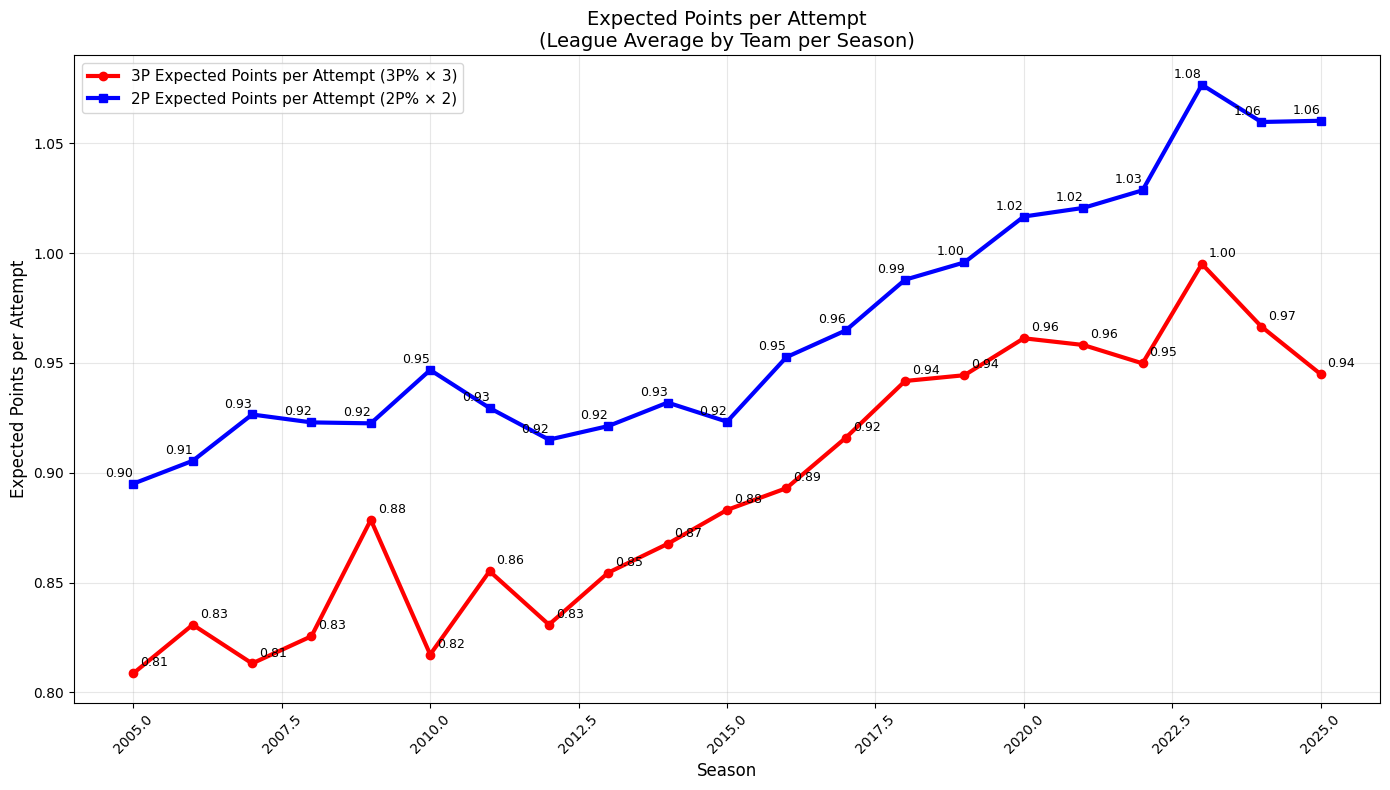

Expected Points per Attempt by Season (Avg across teams):
    Season  2P_exp_per_attempt  3P_exp_per_attempt
0     2005               0.895               0.809
1     2006               0.905               0.831
2     2007               0.927               0.813
3     2008               0.923               0.826
4     2009               0.922               0.879
5     2010               0.947               0.817
6     2011               0.929               0.855
7     2012               0.915               0.831
8     2013               0.921               0.855
9     2014               0.932               0.868
10    2015               0.923               0.883
11    2016               0.953               0.893
12    2017               0.965               0.916
13    2018               0.988               0.942
14    2019               0.996               0.944
15    2020               1.017               0.961
16    2021               1.021               0.958
17    2022              

In [51]:
#Expected point over the season by team, really mathematical value of each type of shot
# Group by Season and Team, calculate expected points per attempt, then average across teams per season
team_stats = df.groupby(['Season', 'Team']).agg({
    '2P%': 'mean',
    '3P%': 'mean'
}).reset_index()

# Calculate expected points PER ATTEMPT for each shot type per team; multiplying shot value 2 or 3 by it accuracy
team_stats['2P_exp_per_attempt'] = team_stats['2P%'] * 2
team_stats['3P_exp_per_attempt'] = team_stats['3P%'] * 3

# Average across teams per season
season_team_avg = team_stats.groupby('Season')[['2P_exp_per_attempt', '3P_exp_per_attempt']].mean().reset_index()
season_team_avg['Season'] = pd.to_numeric(season_team_avg['Season'], errors='coerce')
season_team_avg = season_team_avg[season_team_avg['3P_exp_per_attempt'] > 0].sort_values('Season')

# Create the line plot
plt.figure(figsize=(14, 8))
plt.plot(season_team_avg['Season'], season_team_avg['3P_exp_per_attempt'],
         marker='o', linewidth=3, label='3P Expected Points per Attempt (3P% × 3)', color='red')
plt.plot(season_team_avg['Season'], season_team_avg['2P_exp_per_attempt'],
         marker='s', linewidth=3, label='2P Expected Points per Attempt (2P% × 2)', color='blue')


plt.xlabel('Season', fontsize=12)
plt.ylabel('Expected Points per Attempt', fontsize=12)
plt.title('Expected Points per Attempt\n(League Average by Team per Season)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add value labels
for i in range(-21, 0):
    plt.annotate(f'{season_team_avg["3P_exp_per_attempt"].iloc[i]:.2f}',
                xy=(season_team_avg['Season'].iloc[i], season_team_avg['3P_exp_per_attempt'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)
    plt.annotate(f'{season_team_avg["2P_exp_per_attempt"].iloc[i]:.2f}',
                xy=(season_team_avg['Season'].iloc[i], season_team_avg['2P_exp_per_attempt'].iloc[i]),
                xytext=(-20, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary stats
print("Expected Points per Attempt by Season (Avg across teams):")
print(season_team_avg[['Season', '2P_exp_per_attempt', '3P_exp_per_attempt']].round(3))
print(f"\nRecent season ({season_team_avg['Season'].iloc[-1]}):")
print(f"2P: {season_team_avg['2P_exp_per_attempt'].iloc[-1]:.3f} pts/attempt")
print(f"3P: {season_team_avg['3P_exp_per_attempt'].iloc[-1]:.3f} pts/attempt")
print(f"3P efficiency: {season_team_avg['3P_exp_per_attempt'].iloc[-1]/season_team_avg['2P_exp_per_attempt'].iloc[-1]:.2f}x 2P efficiency")

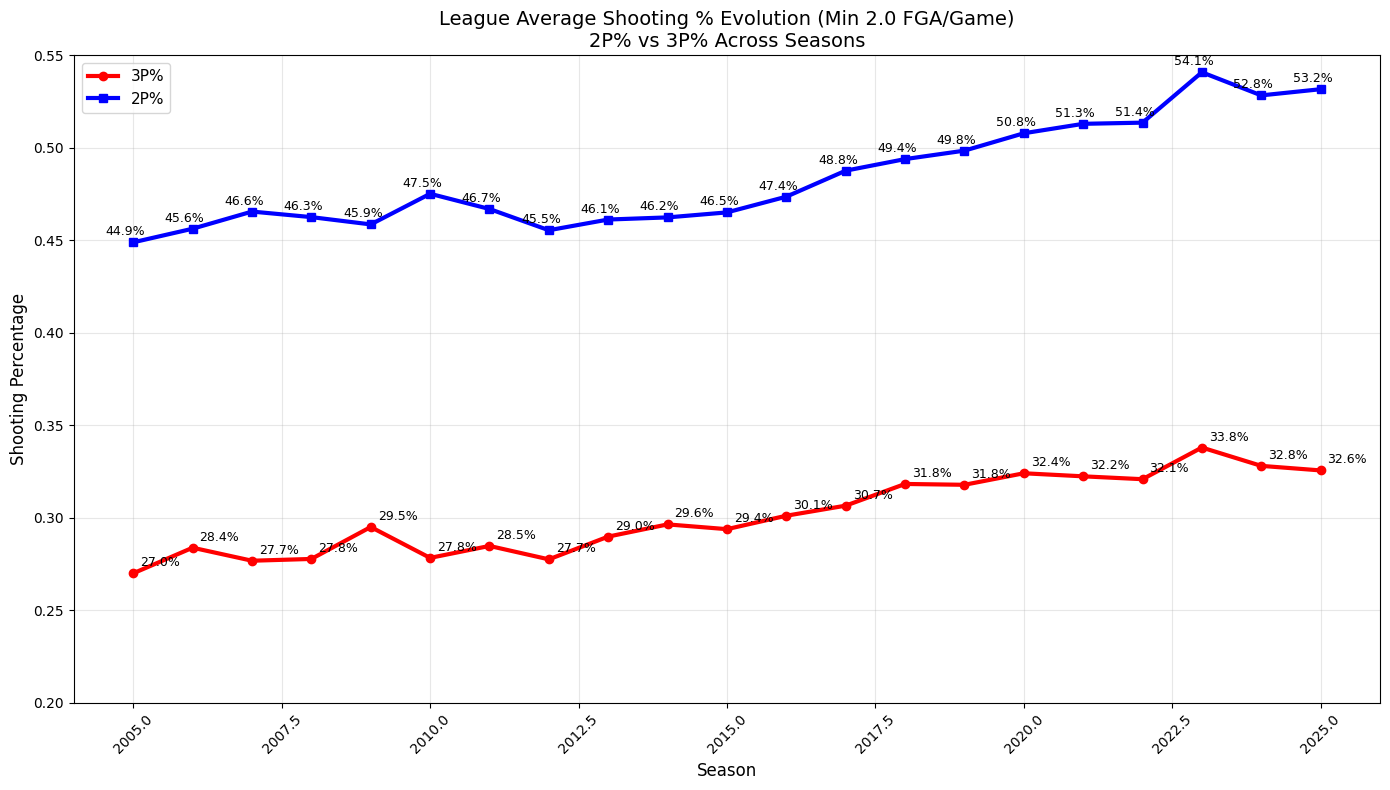

current league average 2P%: 53.2%
current league average 3P%: 32.6%
3P% improvement since 2005: +5.6 percentage points
2P% improvement since 2005: +8.3 percentage points


In [56]:
#Evolution of accuracy 2P% and 3P% by teaam, is the trend of shot selection linked to an increase in effeciency?
#Filter out player who take less than 2 shot to reduce noise.
df_filtered = df[df['FGA'] >= 2.0].copy()

# Group by Season, calculate league average shooting percentages across qualified players
season_shooting = df_filtered.groupby('Season')[['2P%', '3P%']].mean().reset_index()
season_shooting['Season'] = pd.to_numeric(season_shooting['Season'], errors='coerce')
season_shooting = season_shooting.dropna().sort_values('Season')

# Create the line plot
plt.figure(figsize=(14, 8))
plt.plot(season_shooting['Season'], season_shooting['3P%'],
         marker='o', linewidth=3, label='3P%', color='red')
plt.plot(season_shooting['Season'], season_shooting['2P%'],
         marker='s', linewidth=3, label='2P%', color='blue')

plt.xlabel('Season', fontsize=12)
plt.ylabel('Shooting Percentage', fontsize=12)
plt.title('League Average Shooting % Evolution (Min 2.0 FGA/Game)\n2P% vs 3P% Across Seasons', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.ylim(0.20, 0.55)  # Focus on relevant range

# Add value labels on recent seasons
for i in range(-21, 0):
    plt.annotate(f'{season_shooting["3P%"].iloc[i]:.1%}',
                xy=(season_shooting['Season'].iloc[i], season_shooting['3P%'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)
    plt.annotate(f'{season_shooting["2P%"].iloc[i]:.1%}',
                xy=(season_shooting['Season'].iloc[i], season_shooting['2P%'].iloc[i]),
                xytext=(-20, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary stats

print("current league average "f"2P%: {season_shooting['2P%'].iloc[-1]:.1%}")
print("current league average "f"3P%: {season_shooting['3P%'].iloc[-1]:.1%}")

print(f"3P% improvement since {season_shooting['Season'].iloc[0]:.0f}: +{(season_shooting['3P%'].iloc[-1]-season_shooting['3P%'].iloc[0])*100:.1f} percentage points")
print(f"2P% improvement since {season_shooting['Season'].iloc[0]:.0f}: +{(season_shooting['2P%'].iloc[-1]-season_shooting['2P%'].iloc[0])*100:.1f} percentage points")

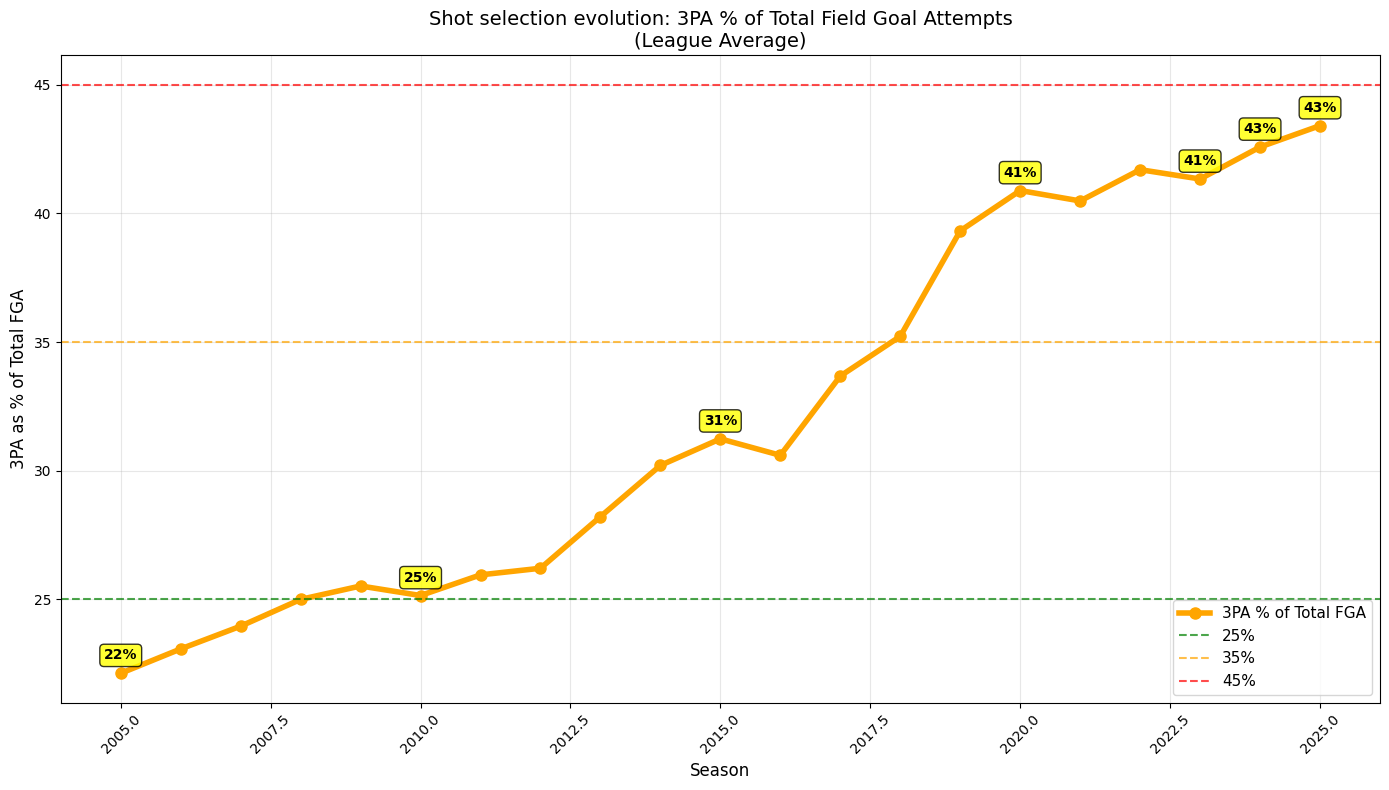

Total increase: +96%
Qualified players: 10,551 player-seasons


In [58]:


# Calculate 3PA as % of total FGA for each player
df_filtered['3PA_ratio'] = df_filtered['3PA'] / df_filtered['FGA']

# Group by season and calculate league average 3PA ratio
season_ratio = df_filtered.groupby('Season')['3PA_ratio'].mean().reset_index()
season_ratio['Season'] = pd.to_numeric(season_ratio['Season'], errors='coerce')
season_ratio = season_ratio.dropna().sort_values('Season')

# Create the line plot
plt.figure(figsize=(14, 8))
plt.plot(season_ratio['Season'], season_ratio['3PA_ratio'] * 100,
         marker='o', linewidth=4, label='3PA % of Total FGA', color='orange', markersize=8)

#reference lines
plt.axhline(y=25, color='green', linestyle='--', alpha=0.7, label='25%')
plt.axhline(y=35, color='orange', linestyle='--', alpha=0.7, label='35%')
plt.axhline(y=45, color='red', linestyle='--', alpha=0.7, label='45%')


plt.xlabel('Season', fontsize=12)
plt.ylabel('3PA as % of Total FGA', fontsize=12)
plt.title('Shot selection evolution: 3PA % of Total Field Goal Attempts\n(League Average)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add value labels every 3 years + recent seasons
label_years = [2005, 2010, 2015, 2020, 2023, 2024, 2025]
for year in label_years:
    if year in season_ratio['Season'].values:
        idx = season_ratio[season_ratio['Season'] == year].index[0]
        plt.annotate(f'{season_ratio.loc[idx, "3PA_ratio"]*100:.0f}%',
                    xy=(year, season_ratio.loc[idx, '3PA_ratio']*100),
                    xytext=(0, 10), textcoords='offset points',
                    ha='center', fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.8))

plt.tight_layout()
plt.show()

# Print key stats for report

print(f"Total increase: +{((season_ratio['3PA_ratio'].iloc[-1]/season_ratio['3PA_ratio'].iloc[0]-1)*100):.0f}%")
print(f"Qualified players: {len(df_filtered):,} player-seasons")


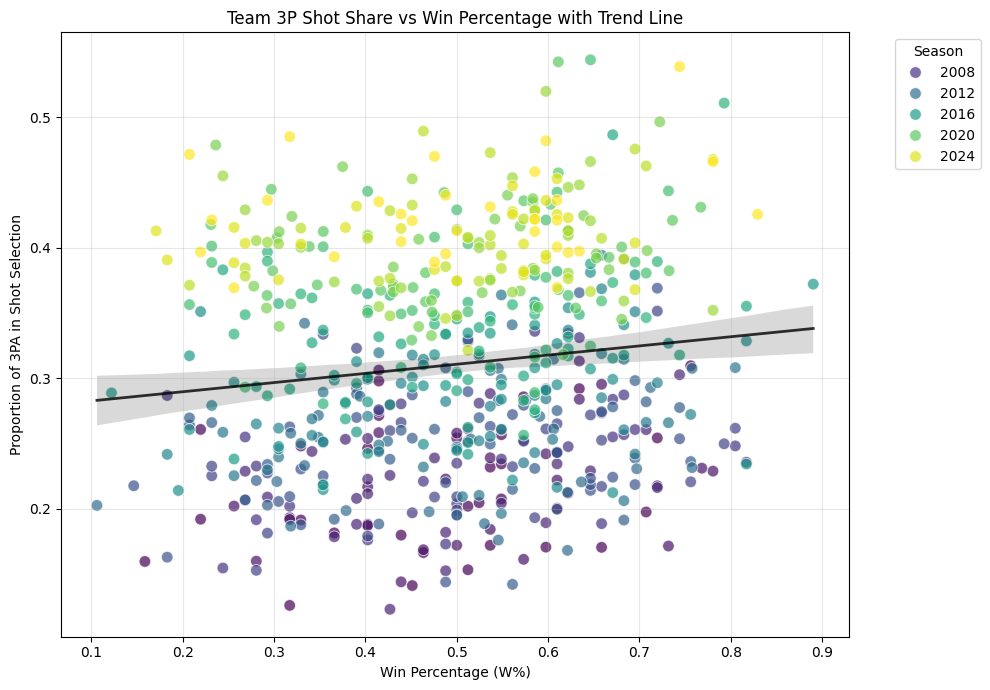

Correlation between W% and 3P shot share: 0.126


In [37]:

#Scatterplot of Win% and 3PA as % to see if there's any correlation between the two
players = nbas_data_full
teams   = sts_data_full


team_shooting = (
    players
    .groupby(['Season', 'Team'])[['3PA', '2PA']]
    .mean()
    .reset_index()
)


team_shooting['3P_share'] = team_shooting['3PA'] / (team_shooting['3PA'] + team_shooting['2PA'])

#Merge W% and team shot selection
team_level = pd.merge(
    team_shooting,
    teams[['Team', 'Season', 'W%']],
    on=['Team', 'Season'],
    how='inner'
)

#Scatter with global trend line
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=team_level,
    x='W%',
    y='3P_share',
    hue='Season',
    palette='viridis',
    alpha=0.7,
    s=70
)


sns.regplot(
    data=team_level,
    x='W%',
    y='3P_share',
    scatter=False,
    color='black',
    line_kws={'linewidth': 2, 'alpha': 0.8}
)

plt.xlabel('Win Percentage (W%)')
plt.ylabel('Proportion of 3PA in Shot Selection')
plt.title('Team 3P Shot Share vs Win Percentage with Trend Line')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Season')
plt.tight_layout()
plt.show()

#Computing correlation between W% and 3P shot share
corr = team_level['W%'].corr(team_level['3P_share'])
print(f"Correlation between W% and 3P shot share: {corr:.3f}")
print("As expected from our previous analysis, 3P aren't more valuable than 2P explaining the lack of strong correlation with W%")

## **Which performance variables are strongly correlated to a good regular season record?**


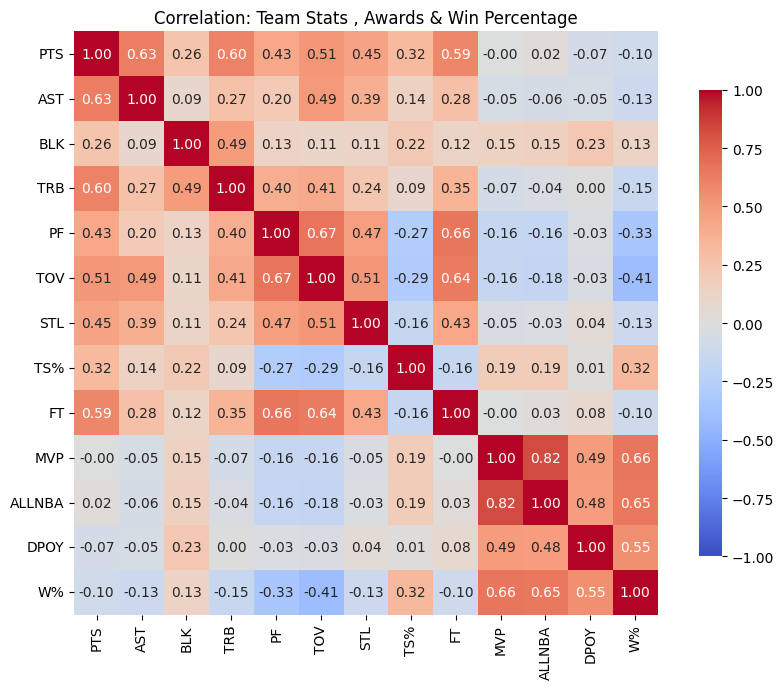

          PTS    AST    BLK    TRB     PF    TOV    STL    TS%     FT    MVP  \
PTS     1.000  0.626  0.256  0.602  0.429  0.512  0.450  0.316  0.593 -0.003   
AST     0.626  1.000  0.088  0.269  0.204  0.494  0.390  0.137  0.280 -0.055   
BLK     0.256  0.088  1.000  0.489  0.131  0.107  0.112  0.219  0.121  0.146   
TRB     0.602  0.269  0.489  1.000  0.397  0.414  0.237  0.092  0.352 -0.072   
PF      0.429  0.204  0.131  0.397  1.000  0.668  0.471 -0.275  0.664 -0.158   
TOV     0.512  0.494  0.107  0.414  0.668  1.000  0.509 -0.291  0.640 -0.161   
STL     0.450  0.390  0.112  0.237  0.471  0.509  1.000 -0.162  0.429 -0.045   
TS%     0.316  0.137  0.219  0.092 -0.275 -0.291 -0.162  1.000 -0.162  0.191   
FT      0.593  0.280  0.121  0.352  0.664  0.640  0.429 -0.162  1.000 -0.001   
MVP    -0.003 -0.055  0.146 -0.072 -0.158 -0.161 -0.045  0.191 -0.001  1.000   
ALLNBA  0.025 -0.058  0.154 -0.037 -0.164 -0.176 -0.030  0.189  0.028  0.821   
DPOY   -0.069 -0.047  0.232  0.005 -0.02

In [59]:
#Heatmap of Major statistic, Awards and W%
stats_cols = ['PTS', 'AST', 'BLK', 'TRB', 'PF', 'TOV', 'STL','FT', 'TS%', 'MVP', 'ALLNBA', 'DPOY']

team_season_stats_awards = (
    nbas_data_full
    .groupby(['Season', 'Team'])[stats_cols]
    .mean()   # Mean Awards and team stats
    .reset_index()
)

team_season_awards = (
    team_season_stats_awards
    .merge(sts_data_full[['Season', 'Team', 'W%']], on=['Season', 'Team'], how='inner')
)

# corr matrix
corr_cols = ['PTS', 'AST', 'BLK', 'TRB', 'PF', 'TOV', 'STL', 'TS%','FT', 'MVP', 'ALLNBA', 'DPOY', 'W%']
corr_matrix = team_season_awards[corr_cols].corr()

#Heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    square=True,
    cbar_kws={'shrink': 0.8}
)
plt.title('Correlation: Team Stats , Awards & Win Percentage')
plt.tight_layout()
plt.show()

print(corr_matrix.round(3))


In [60]:
#Table with Most FTA with FT% and awards to visually show link between Star player and FTA given

cols = ['Player', 'Season', 'FTA', 'FT%', 'Pos']
sub = nbas_data_full[cols].dropna(subset=['FTA'])

# Top 20 seasons by FTA
top20 = sub.sort_values('FTA', ascending=False).head(20)

# Display as a markdown table (to be put in google sheet for esthetic purpose)
print(tbl.tabulate(top20, headers='keys', tablefmt='github', showindex=False))

| Player                  |   Season |   FTA |   FT% | Pos   |
|-------------------------|----------|-------|-------|-------|
| Giannis Antetokounmpo   |     2023 |  12.3 | 0.645 | PF    |
| Joel Embiid             |     2022 |  11.8 | 0.814 | C     |
| James Harden            |     2020 |  11.8 | 0.865 | SG    |
| Joel Embiid             |     2023 |  11.7 | 0.857 | C     |
| Dwight Howard           |     2011 |  11.7 | 0.596 | C     |
| Allen Iverson           |     2007 |  11.6 | 0.885 | PG    |
| Joel Embiid             |     2024 |  11.6 | 0.883 | C     |
| Allen Iverson           |     2006 |  11.5 | 0.814 | PG    |
| Giannis Antetokounmpo   |     2022 |  11.4 | 0.722 | PF    |
| James Harden            |     2019 |  11   | 0.879 | PG    |
| James Harden            |     2017 |  10.9 | 0.847 | PG    |
| Dwight Howard           |     2008 |  10.9 | 0.59  | C     |
| Shai Gilgeous-Alexander |     2023 |  10.9 | 0.905 | PG    |
| Dwight Howard           |     2009 |  10.7 | 0.594 | 

## **Is offense more important than defense ?**


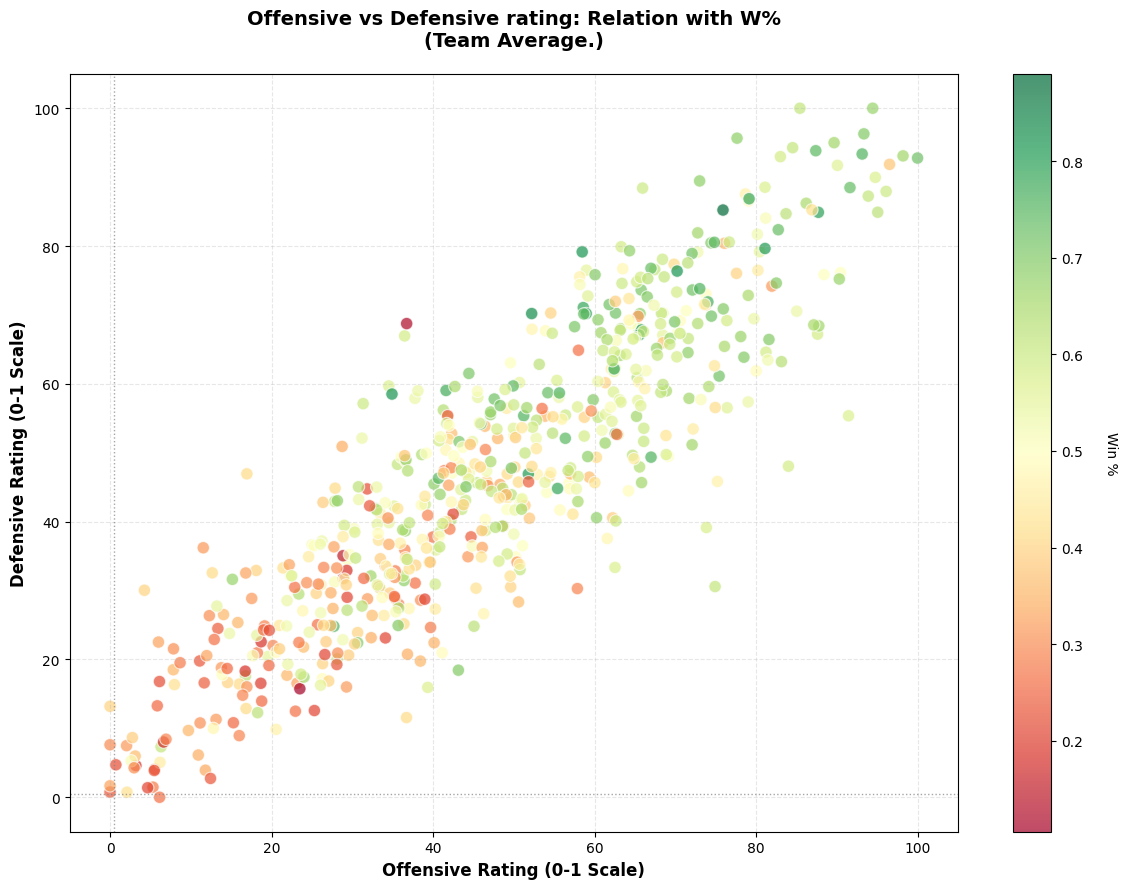

Correlations with Win % (using normalized individual stats):
Offense: 0.532
Defense: 0.557


In [65]:
# To evaluate the impact of defense and offense we create a defensive and offensive rating.
# Normalize stats per 82 games to not be skewed by player mean stats in case of low game play
#filter low-minute players as their impact on a game is low they mostly play once the outcome is already decided
norm_data = nbas_data_full.copy()
norm_data['MP_norm'] = (norm_data['MP'] * norm_data['G']) / 82
norm_data = norm_data[norm_data['MP_norm'] >= 3].copy()

#Classify stat as offensive or defensive
off_stats = ['PTS', 'AST', 'ORB','FT','TS%']
def_stats = ['STL', 'BLK', 'DRB']

for stat in off_stats + def_stats:
    norm_data[f'{stat}_norm'] = (norm_data[stat] * norm_data['G']) / 82

# Aggregate to team level
team_stats = norm_data.groupby(['Season', 'Team']).agg({
    'PTS_norm': 'mean', 'AST_norm': 'mean', 'ORB_norm': 'mean',
    'STL_norm': 'mean', 'BLK_norm': 'mean', 'DRB_norm': 'mean',
    'FT_norm': 'mean', 'TS%_norm': 'mean'
}).reset_index()

# Normalize stats to 0-1 before computing ratings to not skew the offensive rating by different order of magnitude
for stat in ['PTS_norm', 'AST_norm', 'ORB_norm','FT_norm','TS%_norm']:
    team_stats[f'{stat}_scaled'] = team_stats.groupby('Season')[stat].transform(
        lambda x: (x - x.min()) / (x.max() - x.min()))

for stat in ['STL_norm', 'BLK_norm', 'DRB_norm']:
    team_stats[f'{stat}_scaled'] = team_stats.groupby('Season')[stat].transform(
        lambda x: (x - x.min()) / (x.max() - x.min()))

# Compute ratings from scaled stat and multiply by 100 for readability
team_stats['Off_Rating_norm'] = (
    team_stats['PTS_norm_scaled'] +
    team_stats['AST_norm_scaled'] +
    team_stats['ORB_norm_scaled'] +
    team_stats['FT_norm_scaled'] +
    team_stats['TS%_norm_scaled']

) / 5*100

team_stats['Def_Rating_norm'] = (
    team_stats['STL_norm_scaled'] +
    team_stats['BLK_norm_scaled'] +
    team_stats['DRB_norm_scaled']
) / 3*100

# Merge with win percentages
df_plot = pd.merge(team_stats[['Season', 'Team', 'Off_Rating_norm', 'Def_Rating_norm']],
                   sts_data_full[['Team', 'Season', 'W%']],
                   on=['Team', 'Season'])


# Create the scatter plot
fig, ax = plt.subplots(figsize=(12, 9))

scatter = ax.scatter(df_plot['Off_Rating_norm'], df_plot['Def_Rating_norm'],
                     c=df_plot['W%'],
                     cmap='RdYlGn',
                     s=80, alpha=0.7, edgecolor='white', linewidth=0.8)


cbar = plt.colorbar(scatter, ax=ax, label='Win Percentage')
cbar.set_label('Win %', rotation=270, labelpad=25)

ax.set_xlabel('Offensive Rating (0-1 Scale)', fontsize=12, fontweight='bold')
ax.set_ylabel('Defensive Rating (0-1 Scale)', fontsize=12, fontweight='bold')
ax.set_title('Offensive vs Defensive rating: Relation with W%\n(Team Average.)',
             fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')

# Quadrant lines
ax.axhline(y=0.5, color='gray', linestyle=':', alpha=0.7, linewidth=1)
ax.axvline(x=0.5, color='gray', linestyle=':', alpha=0.7, linewidth=1)

plt.tight_layout()
plt.show()

# Correlation summary
print("Correlations with Win % (using normalized individual stats):")
print(f"Offense: {df_plot['Off_Rating_norm'].corr(df_plot['W%']):.3f}")
print(f"Defense: {df_plot['Def_Rating_norm'].corr(df_plot['W%']):.3f}")

In [63]:
# Display top 10 teams by Win % with their off and deff ratings
top_10_winners = df_plot.nlargest(10, 'W%')[['Season', 'Team', 'W%', 'Off_Rating_norm', 'Def_Rating_norm']].copy()
top_10_winners = top_10_winners.round({'W%': 3, 'Off_Rating_norm': 3, 'Def_Rating_norm': 3})

print("Top 10 Teams by Win Percentage:")
print(top_10_winners.to_string(index=False))

# Pretty table with tabulate
print("\nFormatted Table:")
print(tbl.tabulate(top_10_winners, headers='keys', tablefmt='grid', showindex=False))

#print the quantile to be used for the report
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95]
off_quantiles = df_plot['Off_Rating_norm'].quantile(quantiles)
def_quantiles = df_plot['Def_Rating_norm'].quantile(quantiles)

print("\nQuantile Summary:")
print(pd.DataFrame({
    'Offense': off_quantiles.round(3),
    'Defense': def_quantiles.round(3)
}))

Top 10 Teams by Win Percentage:
 Season Team    W%  Off_Rating_norm  Def_Rating_norm
   2016  GSW 0.890           75.907           85.225
   2025  OKC 0.829           52.215           70.201
   2007  DAL 0.817           65.794           67.806
   2015  GSW 0.817           70.228           76.363
   2016  SAS 0.817           34.916           58.517
   2017  GSW 0.817           58.473           79.154
   2008  BOS 0.805           65.514           67.093
   2009  CLE 0.805           51.801           46.921
   2013  MIA 0.805           81.109           79.645
   2009  LAL 0.793           87.722           84.893

Top 10 Average Ratings:
Offense: 64.368
Defense: 71.582
Win %:    0.819

Formatted Table:
+----------+--------+-------+-------------------+-------------------+
|   Season | Team   |    W% |   Off_Rating_norm |   Def_Rating_norm |
+==========+========+=======+===================+===================+
|     2016 | GSW    | 0.89  |            75.907 |            85.225 |
+----------+--

## **What makes a player truly valuable to a team ?**